# Sampling Distribution for Data Science
## Importing necessary libraries


In [37]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## Z- Distribution
### Importing Libraies : 

In [17]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Generating and ploting Z-Distributed Data

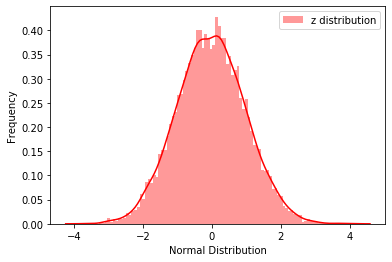

In [107]:
np.random.seed(3)
data_normal=norm.rvs(size=10000,loc=0,scale=1)
#print(data_normal.shape)
ax=sns.distplot(data_normal,bins=100,kde=True,color='red',label='z distribution')
ax.set(xlabel='Normal Distribution',ylabel='Frequency')
plt.legend()
plt.show()

#### Calculating Z-Score and P Value
There is already a function given in scipy.stats called norm.cdf

In [ ]:
import scipy.stats as stats
import pandas as pd
import scipy

In [102]:
def z_to_p(val):
    p=stats.norm.cdf(val)
    print('P(z<z0)')
    return p;


In [103]:
print(z_to_p(1.64))

P(z<z0)
0.9494974165258963


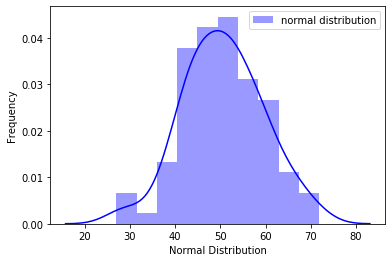

44.71828247736544


In [114]:
mu,sigma=50,10;
np.random.seed(1)
norm_dist=np.random.normal(mu,sigma,100)
#norm_dist[99]=120
ay=sns.distplot(norm_dist,bins=10,kde=True,color='blue',label='normal distribution')
ay.set(xlabel='Normal Distribution',ylabel='Frequency')
plt.legend()
plt.show()


In [118]:
df=pd.DataFrame(norm_dist,columns=['Data'])
df.head()

for col in df.columns:
    col_zscore='z_score'
    df[col_zscore]=((df[col]-df[col].mean())/df[col].std(ddof=0));
    
def z_score(val,df):
    mean=norm_dist.mean()
    std=norm_dist.std(ddof=0)
    z_val=(val-mean)/sigma

In [120]:
#print(z_score)
print(df.tail());

         Data   z_score
95  50.773401  0.018931
96  46.561463 -0.456910
97  50.435969 -0.019190
98  43.799992 -0.768885
99  56.980320  0.720154


In [127]:
def prob_from_z_score(x):
    const=1.0/np.sqrt(2*np.pi)
    #total_eq=(const*np.exp((-x**2)/2.0))
    f= lambda x: (const*np.exp((-x**2)/2))
    prob=scipy.integrate.quad(f,np.NINF,(x))
    #scipy.integrate.quad returns two parameters first is the percetile and the other is error.
    return (prob[0]);

In [128]:
print(prob_from_z_score(1.64))

0.9494974165258789


In [130]:
from scipy.special import ndtri 

In [131]:
def z_score_from_p(x):
    return ndtri(x)

In [132]:
z_score_from_p(0.9494974165258789)

1.6399999999998331

## Chi-Square Distribution
Chi-Square Distribution is a continuous probability distribution that is widely used in Statistical Inferences. The Chi-Square Distribution related to the standanrd normal distribution. If a random variable Z has the standard normal distribution , then Z-square has the Chi-Square distribution with 1 Degree of freedom (1 dof)

[2.95086889 0.04194059 2.0083226  2.7630426  1.38033131 0.50925978
 0.44145012 2.85866021 0.37051774 0.18497592]


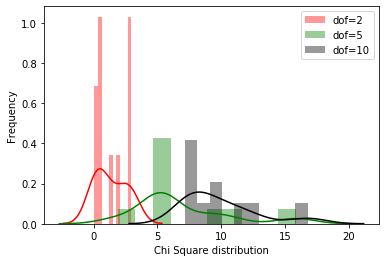

In [179]:
#Generating chi-square distribution
np.random.seed(10)
chi_s=np.random.chisquare(2,10)
chi_p=np.random.chisquare(5,10)
chi_q=np.random.chisquare(10,10)
print(chi_s)
n=np.arange(10)
#plt.plot(n,chi_s,color='red')
#plt.plot(n,chi_p,color='green')
#plt.plot(n,chi_q,color='black')
#plt.legend()
#plt.show()
#stats.chi2.pdf()
#quantile=np.arange(0.01,1,0.1)
#R=
sns.distplot(chi_s,bins=10,kde=True,color='red',label='dof=2')
sns.distplot(chi_p,bins=10,kde=True,color='green',label='dof=5')
sns.distplot(chi_q,bins=10,kde=True,color='black',label='dof=10')
plt.xlabel('Chi Square distribution')
plt.ylabel('Frequency')
plt.legend()
#asss.set(xlabel='chi square distribution',ylabel='Frequency')
plt.show()

In [154]:
#since we have played with norm_dist data and made that into dataframe and converted that to
new_data=df['z_score'].head()
ch=0

In [157]:
print(new_data)


0    1.766651
1   -0.759571
2   -0.665142
3   -1.280623
4    0.909246
Name: z_score, dtype: float64


In [180]:
chi_square=0;
for x in range(0,len(new_data)):
    z_score_sq=((new_data[x]**2))
    chi_square+=z_score_sq
y=chi_square
dof=len(new_data)
print(y,dof)

6.607143675690015 5


In [181]:
#We can findout pdf of 
from scipy.stats import chi2
chi2.pdf(y,dof)

0.08300159109659433

In [182]:
from scipy.special import gamma
#we have used gamma function here

In [183]:
def prob_from_chi_score(y,k):
    const=1.0/((2.0**(dof/2))*gamma(k/2))
    #total_eq=(const*np.exp((-x**2)/2.0))
    f=(const*(y**((k/2)-1))*np.exp((-(y)/2)))
    #prob=scipy.integrate.quad(f,np.NINF,(x))
    #scipy.integrate.quad returns two parameters first is the percetile and the other is error.
    return (f)

In [184]:
prob_from_chi_score(y,dof)

0.08300159109659433

## T - Distribution

In [185]:
sample_mean=450
std=30
pop_mean=500
sample_size=30

In [187]:
t=(sample_mean-pop_mean)/(std/np.sqrt(sample_size))
print(t)

-9.128709291752768


In [203]:
def pdf_from_t_score(t,dof):
    pdf=(((gamma((dof+1.0)/2.0)/(np.sqrt(dof*np.pi))))*(1.0/(1.0+(t**2.0)/dof)**((dof+1.0)/2.0)))
    return pdf

In [204]:
print(pdf_from_t_score(t,2.0))

0.0012685919000748613


## F - Distribution

In [212]:
u1=6.607143675690015
dof1=5.0
u2=6.607143675690015
dof2=4.0
f=(u1/dof1)/(u2/dof2)
print(f)

0.8


In [218]:
def pdf_from_f_score(f,dof1,dof2):
    pdf=(((gamma((dof1+dof2)/2.0))/((gamma(dof1/2.0))*(gamma(dof2/2.0))))*((dof1/dof2)**(dof1/2.0))*((f**(((dof1-2.0)/2.0)))/((1.0+((dof1/dof2)*f))**((dof1+dof2)/2.0))))
    return pdf

In [221]:
pdf_from_f_score(0.987,dof1,dof2)

0.402812806729325